# Movie recommender system
The project here is to make a movie recommender system. Here I try a content based approach which is different than the collaborative. Considering a random user of the dataset e taking into account its movie ratings the system creates a user profile and recommend movies that best fits this profile.

Source:
[GroupLens Research](https://grouplens.org/datasets/movielens/)

In [ ]:
%pip install ipython-autotime  --upgrade
%pip install matplotlib        --upgrade
%pip install pandas            --upgrade
%pip install scikit-learn      --upgrade
%pip install seaborn           --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive, files
import pandas as pd
import warnings

drive.mount('/content/drive', force_remount=True)
warnings.filterwarnings("ignore")
%load_ext autotime

Mounted at /content/drive
time: 1.46 ms (started: 2023-04-19 18:10:28 +00:00)


In [ ]:
links   = pd.read_csv('/content/drive/MyDrive/datasets/movielens-movies/links.csv', encoding='utf-8')
movies  = pd.read_csv('/content/drive/MyDrive/datasets/movielens-movies/movies.csv', encoding='utf-8')
ratings = pd.read_csv('/content/drive/MyDrive/datasets/movielens-movies/ratings.csv', encoding='utf-8')
tags    = pd.read_csv('/content/drive/MyDrive/datasets/movielens-movies/tags.csv', encoding='utf-8')

time: 102 ms (started: 2023-04-19 18:10:28 +00:00)


# EDA

## Links dataframe

In [ ]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


time: 11.9 ms (started: 2023-04-19 18:10:28 +00:00)


In [ ]:
links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB
time: 11.2 ms (started: 2023-04-19 18:10:28 +00:00)


Checking which attributes have NaN values.

In [ ]:
for col in links.columns:
  print(f'{col}: {links[col].hasnans}')

movieId: False
imdbId: False
tmdbId: True
time: 3.2 ms (started: 2023-04-19 18:10:28 +00:00)


## Movies dataframe

In [ ]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


time: 11.3 ms (started: 2023-04-19 18:10:28 +00:00)


In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB
time: 7.92 ms (started: 2023-04-19 18:10:28 +00:00)


Checking which attributes have NaN values.

In [ ]:
for col in movies.columns:
  print(f'{col}: {movies[col].hasnans}')

movieId: False
title: False
genres: False
time: 4.08 ms (started: 2023-04-19 18:10:28 +00:00)


## Ratings dataframe

In [ ]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


time: 8.14 ms (started: 2023-04-19 18:10:28 +00:00)


In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
time: 8.42 ms (started: 2023-04-19 18:10:28 +00:00)


Checking which attributes have NaN values.

In [ ]:
for col in ratings.columns:
  print(f'{col}: {ratings[col].hasnans}')

userId: False
movieId: False
rating: False
timestamp: False
time: 7.58 ms (started: 2023-04-19 18:10:28 +00:00)


## Tags dataframe

In [ ]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


time: 12.2 ms (started: 2023-04-19 18:10:28 +00:00)


In [ ]:
tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB
time: 7.8 ms (started: 2023-04-19 18:10:28 +00:00)


Checking which attributes have NaN values.

In [ ]:
for col in tags.columns:
  print(f'{col}: {tags[col].hasnans}')

userId: False
movieId: False
tag: False
timestamp: False
time: 5.63 ms (started: 2023-04-19 18:10:28 +00:00)


## Ratings e Tag dataframes


I'll check the number of unique users in 'ratings' and 'tag'.

In [ ]:
print(len(ratings['userId'].unique()))
print(len(tags['userId'].unique()))

610
58
time: 4.09 ms (started: 2023-04-19 18:10:28 +00:00)


Pelo visto nem todos os usuários aplicaram tags aos filmes que assistiram, mas não acredito que isso será um problema.
Apparently not all users tagged watched movies, but I don't think this will be a problem.

# Train/Test split

As the task is not supervised, but rather grouping, there is no need to make the split.

# Feature engineering

The transformations I will perform on the datasets are so simple that I will not use transformer classes or pipelines in this project.

The idea is to create a **movie dataset** where the genres will be the features, and the movies, the rows. This matrix will be used to make the user's **profile array** based on the movies he watched. With this array it will be possible to set the rating for all other films that the user has not yet watched. Finally, is just sort the movies in relation to their estimated scores and recommend x number of films.


I was going to use the tags assigned to the films and match them with 'genres', but I noticed that users were assigning tags completely outside the context of the movies. For example, Toy Story had tags such as: 'Al Pacino', 'Heroic Bloodshed', 'mafia', 'gangster', among others. Searching the internet, I discovered that a phrase said by the character Buzz Lightyear (Toy Story) and another by Tony Montana (Pacino - Scarface) was part of a British radio poll about the best phrases in the history of cinema. These tags probably came from there, but they have nothing to do with the movie Toy Story. We call this "noise", and to avoid this, not just in this movie, but in the entire dataset I decided to use only 'genres' to form the movie data matrix.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

time: 428 ms (started: 2023-04-19 18:10:28 +00:00)


**Etapa ##:** Remove the movie names as they not be necessary. Here, I also make some additional adjustments, such as:

*   Replace the '|' for a blank space
*   Transform all strings to lowercase
*   Format the blanks


In [ ]:
movies['genres'] = movies['genres'].str.replace('|', ' ')
movies['genres'] = movies['genres'].str.lower()
movies['genres'] = movies['genres'].str.replace(r'\s{2,}', ' ', regex=True)

time: 18.6 ms (started: 2023-04-19 18:10:28 +00:00)


# Modeling
In this project, I will not use traditional Machine Learning models. I will use a weighted average technique and very simple matrix operations. I will do it this way because I will use the movies that the user has already watched as a reference to recommend others based on his tastes.

Another way to make recommendations is to choose a movie, and based on its genres, recommend others that are most similar to them. In this case, a Machine Learning algorithm is necessary, such as NearestNeighbors, to calculate the cosine similarity between the vectors that represent each movie. As I already did something similar in another book recommendation project, I prefer to try another approach here.

**Step ##:** Create a binary matrix where each column will be a movie genre and each row will be a movie from the dataset.

0.   Movie does not belong to the genre
1.   Movie belongs to the genre



In [ ]:
cv     = CountVectorizer(binary=True)
matrix = cv.fit_transform(movies['genres']).toarray()

time: 56.4 ms (started: 2023-04-19 18:10:29 +00:00)


**Step ##:** Make a new dataset from the matrix above plus 'movieId'. This set will be essential in the next steps.

In [ ]:
dataset = pd.DataFrame(data=matrix, index=movies.index, columns=cv.get_feature_names_out())
dataset['movieId'] = movies['movieId']

time: 2.16 ms (started: 2023-04-19 18:10:29 +00:00)


**Step ##:** Select a random user with all the movies he have watched.

In [ ]:
user_id = ratings.sample(1)['userId'].values[0]
mask    = ratings['userId'] == user_id
user    = ratings[mask]

time: 9.66 ms (started: 2023-04-19 18:10:29 +00:00)


**Step ##:** Create an array containing the movies the user watched.

In [ ]:
mask          = dataset['movieId'].isin(user['movieId'])
usr_movies    = dataset[mask]
movies_matrix = usr_movies.iloc[:, :-1].values # ignoro a última coluna, movieId.

time: 6.76 ms (started: 2023-04-19 18:10:29 +00:00)


**Step ##:** Multiply each movie score by the corresponding row in the movie matrix.
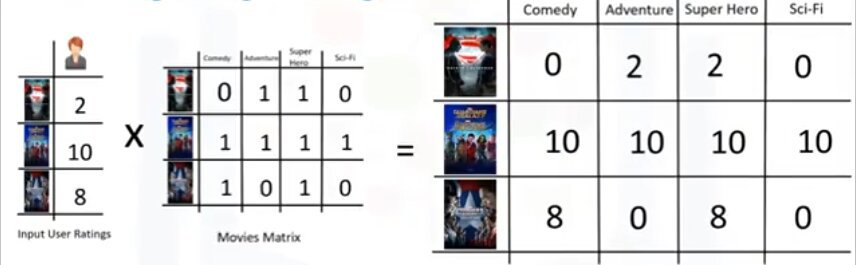

In [ ]:
user_ratings    = user['rating'].values
weighted_matrix = np.multiply(user_ratings.reshape(-1, 1), movies_matrix)

time: 1.16 ms (started: 2023-04-19 18:10:29 +00:00)


**Step ##:** Add up the scores by gender. The result will be an array with the sum of the scores for each movie genre that the user watched.

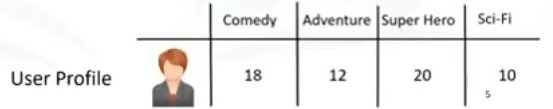

In [ ]:
user_profile = np.sum(weighted_matrix, axis=0)

time: 1.33 ms (started: 2023-04-19 18:10:29 +00:00)


**Step ##:** Normalize the array.

In [ ]:
total_ratings = np.sum(user_profile)
user_profile  = user_profile / total_ratings

time: 625 µs (started: 2023-04-19 18:10:29 +00:00)


**Step ##:** Select movies that have not been watched by the selected user.

In [ ]:
mask = dataset['movieId'].isin(user['movieId'])
unw_movies = dataset[~mask]
unwatched_movies = unw_movies.iloc[:, :-1].values # ignoro a última coluna, movieId.

time: 10.1 ms (started: 2023-04-19 18:10:29 +00:00)


**Step ##:** Multiply the user profile array that contains the weighted average of each genre by the matrix of movies that the user has not watched. Furthermore, for each movie I will sum up all the scores. The result is the likely user rating for each movie.
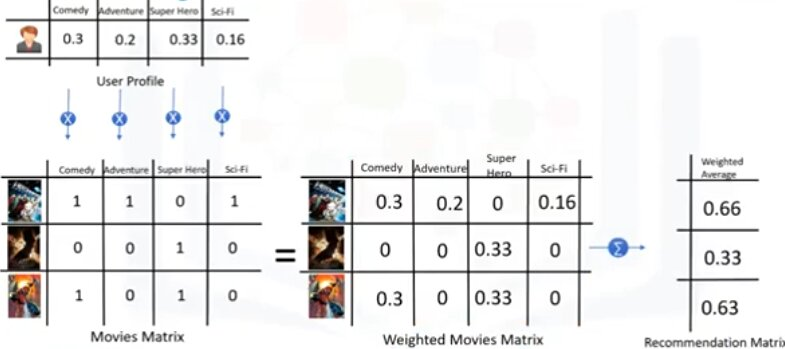

In [ ]:
candidates_movies = np.matmul(user_profile, unwatched_movies.T)

time: 3.8 ms (started: 2023-04-19 18:10:29 +00:00)


**Step ##:** Create a Pandas Series with movies not yet watched by the user and their estimated ratings, and sort it in descending order according to the ratings.

In [ ]:
estimated_ratings = pd.Series(data=candidates_movies, index=unw_movies['movieId'])
estimated_ratings = estimated_ratings.sort_values(ascending=False)

time: 4.46 ms (started: 2023-04-19 18:10:29 +00:00)


# Recommendation
Now, simply select n movies with the best rating estimates to recommend to the user. These will be the movies closest to his taste.

In [ ]:
# select the 5 most recommended movies
recommended_movies = estimated_ratings[:6]
mask = movies['movieId'].isin(recommended_movies.index)
movies[mask]['title']

3460                     Osmosis Jones (2001)
3608                    Stunt Man, The (1980)
4631                     Interstate 60 (2002)
5808      Seven-Per-Cent Solution, The (1976)
7441                            Rubber (2010)
8597    Dragonheart 2: A New Beginning (2000)
Name: title, dtype: object

time: 6.65 ms (started: 2023-04-19 18:10:29 +00:00)
